<a href="https://colab.research.google.com/github/pratap-nitjsr/Driver-Drowsiness/blob/main/Driver_Drowsiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pratapkr","key":"01c80707e3667f5de4c87b3d71224802"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d prasadvpatil/mrl-dataset

 40% 9.00M/22.6M [00:00<00:00, 19.4MB/s]
100% 22.6M/22.6M [00:00<00:00, 43.5MB/s]


In [ ]:
!unzip /content/mrl-dataset.zip -d /content

Archive:  /content/mrl-dataset.zip
  inflating: /content/train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00002_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00003_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00004_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00005_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00006_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00007_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00008_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00009_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00011_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00013_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00014_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0001_00015_0_0_0_0_0_01.png  
  inflating: /content/train/Closed_Eyes/s0

In [ ]:
path = '/content/train'

In [ ]:
import os
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

In [ ]:
img = cv2.imread('/content/train/Closed_Eyes/s0001_00003_0_0_0_0_0_01.png')
img.shape

(81, 81, 3)

In [ ]:
data = keras.preprocessing.image_dataset_from_directory(
    path,
    batch_size =32,
    image_size =(81,81),

    shuffle = True,
    seed =123,
    )

Found 4000 files belonging to 2 classes.


In [ ]:
total_samples = data.cardinality().numpy()

validation_samples = int(0.2 * total_samples)

training_data = data.skip(validation_samples)
validation_data = data.take(validation_samples)

In [ ]:
model = Sequential()

pretrained_model= keras.applications.ResNet50(include_top=False,
                   input_shape=(81,81,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
epochs=50
history = model.fit(

  training_data,
  validation_data=validation_data,
  epochs=epochs
)

Epoch 1/50
100/100 [==============================] - 10s 40ms/step - loss: 0.5320 - accuracy: 0.7294 - val_loss: 0.3309 - val_accuracy: 0.9362
Epoch 2/50
100/100 [==============================] - 3s 29ms/step - loss: 0.2552 - accuracy: 0.9650 - val_loss: 0.1988 - val_accuracy: 0.9875
Epoch 3/50
100/100 [==============================] - 5s 35ms/step - loss: 0.1743 - accuracy: 0.9791 - val_loss: 0.1476 - val_accuracy: 0.9900
Epoch 4/50
100/100 [==============================] - 3s 30ms/step - loss: 0.1353 - accuracy: 0.9834 - val_loss: 0.1167 - val_accuracy: 0.9900
Epoch 5/50
100/100 [==============================] - 4s 38ms/step - loss: 0.1117 - accuracy: 0.9869 - val_loss: 0.1013 - val_accuracy: 0.9900
Epoch 6/50
100/100 [==============================] - 3s 30ms/step - loss: 0.0974 - accuracy: 0.9881 - val_loss: 0.0865 - val_accuracy: 0.9912
Epoch 7/50
100/100 [==============================] - 3s 31ms/step - loss: 0.0851 - accuracy: 0.9912 - val_loss: 0.0771 - val_accuracy: 0.993

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

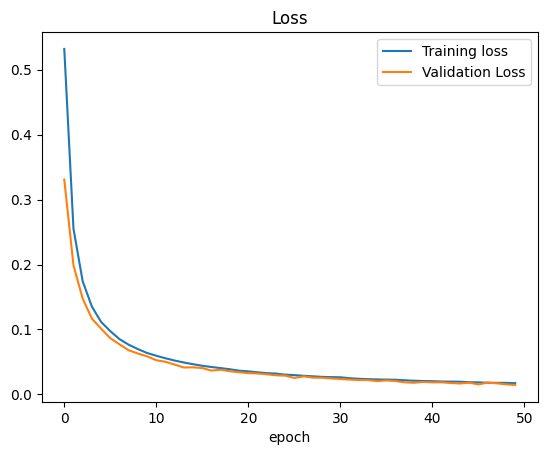

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['Training loss','Validation Loss'])
plt.show()

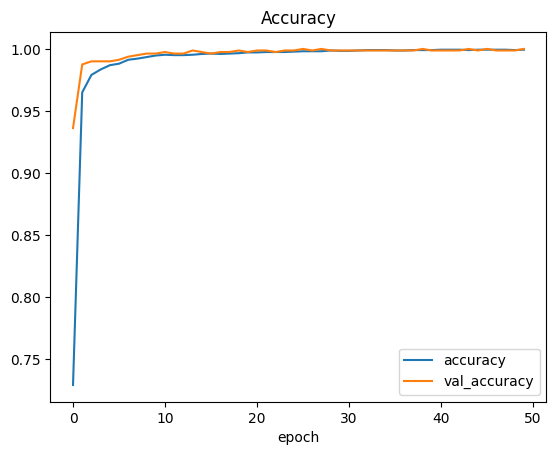

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [ ]:
model.save('content/final_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
